In [11]:
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib
from shapely.geometry import Point


In [3]:
df=pd.read_csv("whitestores.csv")

In [5]:
df['Описание'].unique()

array(['автомат самообслуживания', 'автомат снековой продукции',
       'даркстор', 'кофейня', 'магазин с доставкой полезных продуктов',
       'офис', 'распределительный центр', 'склад'], dtype=object)

In [9]:
df=df[df['Описание']=='магазин с доставкой полезных продуктов']

In [12]:
geometry = [Point(xy) for xy in zip(df['Долгота'], df['Широта'])]
gdf_ws = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
gdf_ws.to_crs("EPSG:32636", inplace=True)

In [55]:
gdf_ws.buffer(200).explore()

In [50]:
neighb=gpd.read_file("neighb_level5.gpkg")

Cannot find header.dxf (GDAL_DATA is not defined)


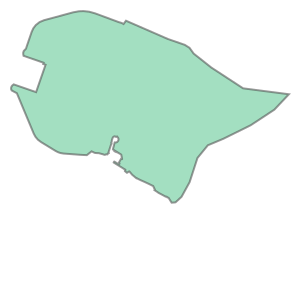

In [64]:
neighb.iloc[5]['geometry']

In [68]:
gdf_vo=gdf_ws[gdf_ws.within(neighb.iloc[5]['geometry'])]

In [87]:
gdf_vo.buffer(400).difference(gdf_vo.buffer(200).unary_union, align=True).explore()

In [77]:
nfull=gpd.read_file("neighbourhoods_full.gpkg")

In [80]:
gdf_vl=gdf_ws[gdf_ws.within(nfull[nfull['name']=='Владимирский округ'])]

C:\Temp\ipykernel_12436\3713395051.py:1: UserWarning: The indices of the two GeoSeries are different.
  gdf_vl=gdf_ws[gdf_ws.within(nfull[nfull['name']=='Владимирский округ'])]
C:\ProgramData\anaconda3\envs\spatial_analysis_course\Lib\site-packages\geopandas\geodataframe.py:1456: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


In [92]:
build=gpd.read_file('buildings_spb/BUILDINGS1.gpkg')

In [97]:
build_buffered=build.buffer(50)

In [105]:
built_vo=build_buffered[build_buffered.within(neighb.iloc[5]['geometry'])].unary_union

In [106]:
orders=gpd.read_file('order_points_FULL.gpkg')

In [107]:
orders_vo=orders[orders.within(built_vo)]

In [109]:
orders_vo

id_order date_completed     Широта    Долгота     darkstore_name  \
51      300162194     2024-06-01  59.928799  30.260500  4986ДС_СПб_5яВО70   
59      300169087     2024-06-01  59.939659  30.204561  4986ДС_СПб_5яВО70   
91      300421535     2024-06-01  59.947121  30.270101  4986ДС_СПб_5яВО70   
96      300323671     2024-06-01  59.940362  30.210352  4986ДС_СПб_5яВО70   
117     300563986     2024-06-01  59.940618  30.219533  4986ДС_СПб_5яВО70   
...           ...            ...        ...        ...                ...   
777380  304240009     2024-06-10  59.937013  30.255620  4986ДС_СПб_5яВО70   
777430  304240734     2024-06-10  59.939978  30.250559  4986ДС_СПб_5яВО70   
777433  304240762     2024-06-10  59.936901  30.243200  4986ДС_СПб_5яВО70   
777504  304241795     2024-06-10  59.936481  30.269829  4986ДС_СПб_5яВО70   
777537  304242320     2024-06-10  59.947086  30.229217  4986ДС_СПб_5яВО70   

                                                  service  order_sum  \
51      Доставка сейчас                               ...   13399.52   
59      Доставка сейчас                               ...     460.00   
91      Доставка за 1 час                             ...     837.00   
96      Доставка сейчас                               ...    3752.00   
117     Доставка сейчас                               ...    1579.40   
...                                                   ...        ...   
777380  Доставка за 1 час                             ...     843.60   
777430  Доставка за 1 час                             ...    1534.22   
777433  Доставка за 1 час                             ...    2820.00   
777504  Доставка за 1 час                             ...     200.00   
777537  Доставка сейчас                               ...     617.80   

        Время_взятия_на_сборку  Время_сборки  Время_взятия_в_доставку  \
51                         NaN           NaN                      NaN   
59                         NaN           NaN                      NaN   
91                         NaN           NaN                      NaN   
96                         NaN           NaN                      NaN   
117                        NaN           NaN                      NaN   
...                        ...           ...                      ...   
777380                     2.0           2.0                      3.0   
777430                     2.0           8.0                      2.0   
777433                     1.0           3.0                      4.0   
777504                     NaN           NaN                      NaN   
777537                     0.0           3.0                      3.0   

        Время_доставки Вид курьера day workday       neighbourhood  \
51                12.0        Авто  01       0           округ № 7   
59                 8.0        Авто  01       0       округ Морской   
91                 7.0        Вело  01       0  Васильевский округ   
96                20.0        Авто  01       0       округ Морской   
117               15.0        Авто  01       0       округ Морской   
...                ...         ...  ..     ...                 ...   
777380            33.0        Вело  10       1  Васильевский округ   
777430            23.0        Вело  10       1        округ Гавань   
777433            33.0        Вело  10       1        округ Гавань   
777504             NaN        Вело  10       1           округ № 7   
777537            16.0        Авто  10       1       округ Морской   

                              geometry  
51      POINT (346897.860 6646650.163)  
59      POINT (343823.905 6647989.616)  
91      POINT (347518.385 6648667.297)  
96      POINT (344150.610 6648054.207)  
117     POINT (344664.522 6648061.113)  
...                                ...  
777380  POINT (346663.163 6647575.704)  
777430  POINT (346394.214 6647917.455)  
777433  POINT (345968.966 6647592.082)  
777504  POINT (347454.319 6647483.652)  
777537  POINT (345235.480 6648758.321)  

[36137 r

In [111]:
gdf_vo

Наименование                                Описание  \
42      ВкусВилл  магазин с доставкой полезных продуктов   
52      ВкусВилл  магазин с доставкой полезных продуктов   
73      ВкусВилл  магазин с доставкой полезных продуктов   
96      ВкусВилл  магазин с доставкой полезных продуктов   
127     ВкусВилл  магазин с доставкой полезных продуктов   
205     ВкусВилл  магазин с доставкой полезных продуктов   
236     ВкусВилл  магазин с доставкой полезных продуктов   
254     ВкусВилл  магазин с доставкой полезных продуктов   
262     ВкусВилл  магазин с доставкой полезных продуктов   
272     ВкусВилл  магазин с доставкой полезных продуктов   
291     ВкусВилл  магазин с доставкой полезных продуктов   
313     ВкусВилл  магазин с доставкой полезных продуктов   
314     ВкусВилл  магазин с доставкой полезных продуктов   
319     ВкусВилл  магазин с доставкой полезных продуктов   
327     ВкусВилл  магазин с доставкой полезных продуктов   
331     ВкусВилл  магазин с доставкой полезных продуктов   
373     ВкусВилл  магазин с доставкой полезных продуктов   
383     ВкусВилл  магазин с доставкой полезных продуктов   

                                               Рубрики  \
42                                        Супермаркеты   
52                                        Супермаркеты   
73                                        Супермаркеты   
96      Супермаркеты; Доставка продуктов; Доставка еды   
127                                       Супермаркеты   
205                   Супермаркеты; Доставка продуктов   
236                   Супермаркеты; Доставка продуктов   
254     Супермаркеты; Доставка продуктов; Доставка еды   
262     Супермаркеты; Доставка продуктов; Доставка еды   
272     Супермаркеты; Доставка еды; Доставка продуктов   
291  Супермаркеты; Доставка еды; Доставка продуктов...   
313     Супермаркеты; Доставка продуктов; Доставка еды   
314     Супермаркеты; Доставка продуктов; Доставка еды   
319     Супермаркеты; Доставка еды; Доставка продуктов   
327  Супермаркеты; Кулинарии; Доставка продуктов; Д...   
331     Супермаркеты; Доставка продуктов; Доставка еды   
373     Супермаркеты; Доставка продуктов; Доставка еды   
383     Супермаркеты; Доставка продуктов; Доставка еды   

                              Адрес Комментарий к адресу  Почтовый индекс  \
42       улица Беринга, 27 к6 лит М                  NaN         199397.0   
52        Средний проспект В.О., 97                  NaN         199106.0   
73               7-я линия В.О., 72               1 этаж         199178.0   
96          Малый проспект В.О., 73                  NaN         199406.0   
127                    Вёсельная, 7       цокольный этаж         199106.0   
205       улица Уральская, 21 лит А               1 этаж         199155.0   
236              26-я линия В.О., 7               1 этаж         199106.0   
254               6-я линия В.О., 9               1 этаж         199034.0   
262           Вилькицкий бульвар, 5               1 этаж         199225.0   
272       Средний проспект В.О., 83               1 этаж         199106.0   
291              1-я линия В.О., 44       цокольный этаж         199004.0   
313     Малый проспект В.О., 52 ст1               1 этаж         199178.0   
314          улица Уральская, 6 ст1               1 этаж         199155.0   
319          16-я линия В.О., 13/46               1 этаж         199034.0   
327  улица Кораблестроителей, 44 к1               1 этаж         199058.0   
331              Наличная улица, 22               1 этаж         199406.0   
373   улица Кораблестроителей, 32/1               1 этаж         199058.0   
383       Средний проспект В.О., 45               1 этаж         199178.0   

                 Микрорайон                   Район            Город Округ  \
42             Васильевский  Василеостровский район  Санкт-Петербург   NaN   
52                   Гавань  Василеостровский район  Санкт-Петербург   NaN   
73             Васильевский  Василеостровский район  Санкт-Пет

In [112]:
buildings=gpd.read_file("buildings_statistics.gpkg")

In [116]:
buildings_VO=buildings[buildings.within(neighb.iloc[5]['geometry'])]

In [126]:
buildings_VO_near=buildings_VO[buildings_VO.intersects(gdf_vo.buffer(200).unary_union)]

In [127]:
buildings_VO_far=buildings_VO[~buildings_VO.intersects(gdf_vo.buffer(200).unary_union)]

In [129]:
buildings_VO_near['orders_per_person'].mean()

0.2541160222530783

In [130]:
buildings_VO_far['orders_per_person'].mean()

0.3088866041214211

In [132]:
buildings_VO_near['Средний чек'].mean()

1336.1773266873263

In [133]:
buildings_VO_far['Средний чек'].mean()

1400.1938422106527

In [135]:
buildings_VO_near['rubles_per_person'].mean()

346.16969570445707

In [136]:
buildings_VO_far['rubles_per_person'].mean()

462.12289822190684

In [141]:
all_near=buildings[buildings.intersects(gdf_ws.buffer(200).unary_union)]

In [142]:
all_far=buildings[~buildings.intersects(gdf_ws.buffer(200).unary_union)]

In [143]:
all_near.explore()

In [148]:
all_near=all_near[all_near['people']>5]
all_far=all_far[all_far['people']>5]

In [149]:
all_near['orders_per_person'].mean()

0.1733116622605399

In [150]:
all_far['orders_per_person'].mean()

0.12665740316961613

In [151]:
all_near['Средний чек'].mean()

1340.674428379738

In [153]:
all_far['Средний чек'].mean()

1408.6264568962997

In [154]:
all_near['rubles_per_person'].mean()

232.6491214253592

In [155]:
all_far['rubles_per_person'].mean()

178.47114796086638

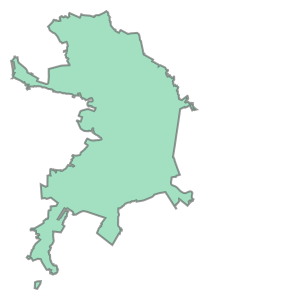

In [157]:
neighb.unary_union

In [158]:
spb_near=all_near[all_near.within(neighb.unary_union)]

In [159]:
spb_far=all_far[all_far.within(neighb.unary_union)]

In [160]:
spb_near['orders_per_person'].mean()

0.18264076126468462

In [161]:
spb_far['orders_per_person'].mean()

0.12163698856153674

In [162]:
spb_near['Средний чек'].mean()

1338.2985976264345

In [163]:
spb_far['Средний чек'].mean()

1383.1418479804372

In [164]:
spb_near['rubles_per_person'].mean()

244.48819828133736

In [165]:
spb_far['rubles_per_person'].mean()

166.49127019078736

In [168]:
neighb

osm_id                     name  \
0    338636         Московский район   
1    363103     Красносельский район   
2    368287            Невский район   
3    369514        Фрунзенский район   
4   1114193     Адмиралтейский район   
5   1114252   Василеостровский район   
6   1114354         Выборгский район   
7   1114806        Калининский район   
8   1114809          Кировский район   
9   1114895  Красногвардейский район   
10  1114902        Центральный район   
11  1114905      Петроградский район   
12  1115367         Приморский район   

                                             geometry  
0   MULTIPOLYGON (((345215.038 6633812.256, 345171...  
1   MULTIPOLYGON (((334695.162 6618127.244, 335155...  
2   MULTIPOLYGON (((360617.102 6646904.069, 360441...  
3   MULTIPOLYGON (((351127.690 6643828.786, 351126...  
4   MULTIPOLYGON (((351285.372 6645015.484, 351289...  
5   MULTIPOLYGON (((346953.976 6645376.387, 346935...  
6   MULTIPOLYGON (((340414.738 6660298.036, 343783...  
7   MULTIPOLYGON (((352534.469 6648941.267, 351975...  
8   MULTIPOLYGON (((347723.133 6643638.891, 347710...  
9   MULTIPOLYGON (((355210.170 6649675.672, 354993...  
10  MULTIPOLYGON (((351189.613 6645598.196, 351196...  
11  MULTIPOLYGON (((345090.121 6652100.785, 344894...  
12  MULTIPOLYGON (((350543.761 6652038.560, 350460...

In [170]:
for index, row in neighb.iterrows():
    near=all_near[all_near.within(row['geometry'])]
    far=all_far[all_far.within(row['geometry'])]
    neighb.at[index, 'near_orders_per_person']=near['orders_per_person'].mean()
    neighb.at[index, 'far_orders_per_person']=far['orders_per_person'].mean()
    neighb.at[index, 'near_mean_check']=near['Средний чек'].mean()
    neighb.at[index, 'far_mean_check']=far['Средний чек'].mean()
    neighb.at[index, 'near_rubles_per_person']=near['rubles_per_person'].mean()
    neighb.at[index, 'far_rubles_per_person']=far['rubles_per_person'].mean()

In [202]:
neighb.iloc[[2]].explore()

In [172]:
import matplotlib.pyplot as plt
import numpy as np

<Figure size 5000x2000 with 0 Axes>

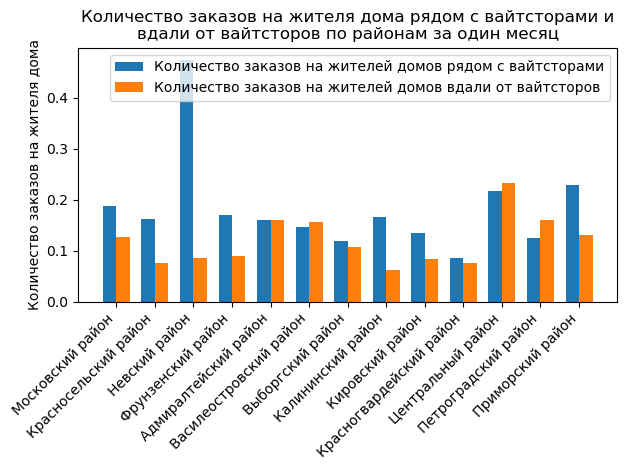

In [178]:
# Задание ширины столбца и позиции для каждого столбца
bar_width = 0.35
index = np.arange(len(neighb['name']))

# Увеличение размера фигуры (ширины графика)
plt.figure(figsize=(50, 20))

# Построение графика
fig, ax = plt.subplots()

# Столбцы для Показателя 1
bar1 = ax.bar(index, neighb['near_orders_per_person'], bar_width, label='Количество заказов на жителей домов рядом с вайтсторами')

# Столбцы для Показателя 2 (смещение на ширину столбца)
bar2 = ax.bar(index + bar_width, neighb['far_orders_per_person'], bar_width, label='Количество заказов на жителей домов вдали от вайтсторов')

# Настройка оси x
# ax.set_xlabel('Район')
ax.set_ylabel('Количество заказов на жителя дома')
ax.set_title('Количество заказов на жителя дома рядом с вайтсторами и\nвдали от вайтсторов по районам за один месяц')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(neighb['name'], rotation=45, ha='right')

# Легенда
ax.legend()

# Подгонка графика под метки оси X
plt.tight_layout()

# Показать график
plt.show()

C:\Temp\ipykernel_12436\1831878455.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 10000x2000 with 0 Axes>

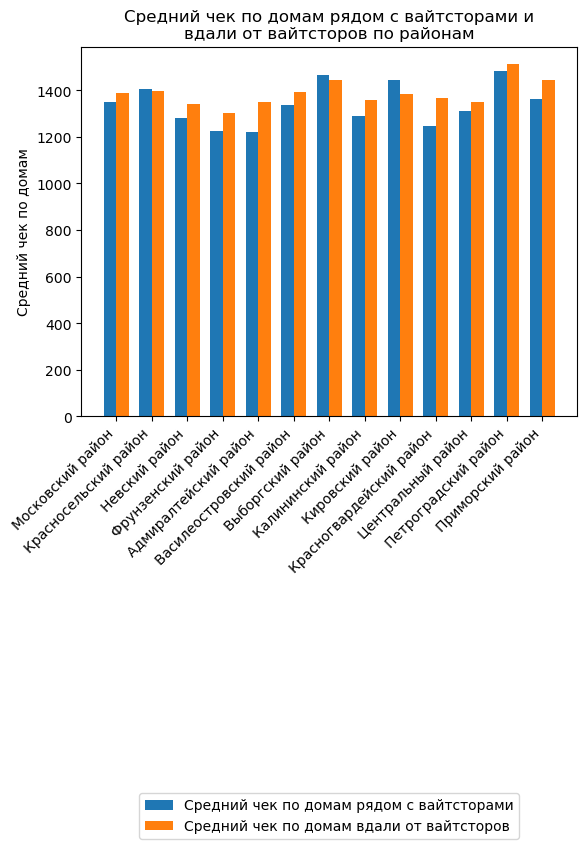

In [193]:
# Задание ширины столбца и позиции для каждого столбца
bar_width = 0.35
index = np.arange(len(neighb['name']))

# Увеличение размера фигуры (ширины графика)
plt.figure(figsize=(100, 20))

# Построение графика
fig, ax = plt.subplots()

# Столбцы для Показателя 1
bar1 = ax.bar(index, neighb['near_mean_check'], bar_width, label='Средний чек по домам рядом с вайтсторами')

# Столбцы для Показателя 2 (смещение на ширину столбца)
bar2 = ax.bar(index + bar_width, neighb['far_mean_check'], bar_width, label='Средний чек по домам вдали от вайтсторов')

# Настройка оси x
# ax.set_xlabel('Район')
ax.set_ylabel('Средний чек по домам')
ax.set_title('Средний чек по домам рядом с вайтсторами и\nвдали от вайтсторов по районам')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(neighb['name'], rotation=45, ha='right')

# Легенда
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -1))  # Размещение легенды под графиком

# Подгонка графика под метки оси X
plt.tight_layout()

# Показать график
plt.show()

C:\Temp\ipykernel_12436\820574352.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 10000x2000 with 0 Axes>

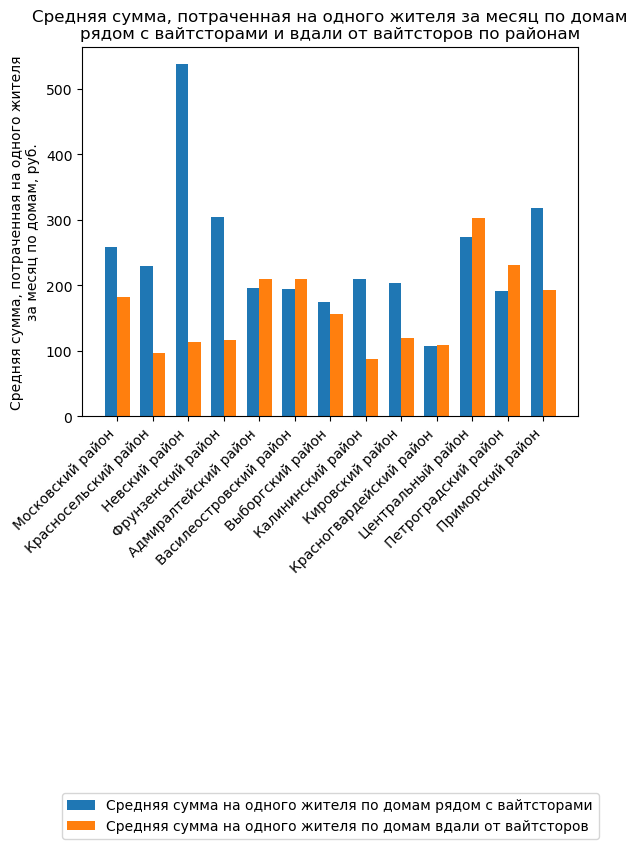

In [199]:
# Задание ширины столбца и позиции для каждого столбца
bar_width = 0.35
index = np.arange(len(neighb['name']))

# Увеличение размера фигуры (ширины графика)
plt.figure(figsize=(100, 20))

# Построение графика
fig, ax = plt.subplots()

# Столбцы для Показателя 1
bar1 = ax.bar(index, neighb['near_rubles_per_person'], bar_width, label='Средняя сумма на одного жителя по домам рядом с вайтсторами')

# Столбцы для Показателя 2 (смещение на ширину столбца)
bar2 = ax.bar(index + bar_width, neighb['far_rubles_per_person'], bar_width, label='Средняя сумма на одного жителя по домам вдали от вайтсторов')

# Настройка оси x
# ax.set_xlabel('Район')
ax.set_ylabel('Средняя сумма, потраченная на одного жителя\nза месяц по домам, руб.')
ax.set_title('Средняя сумма, потраченная на одного жителя за месяц по домам\nрядом с вайтсторами и вдали от вайтсторов по районам')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(neighb['name'], rotation=45, ha='right')

# Легенда
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -1))  # Размещение легенды под графиком

# Подгонка графика под метки оси X
plt.tight_layout()

# Показать график
plt.show()